In [4]:
def test_integer(choice):
    
    #define a range of accetable values for choice if it is a digit
    acceptable_range = range(1,10)

    # test if choice is a digit, if not return true of false
    if choice.isdigit() and choice in acceptable_range:
        return True
    else: 
        return False

value = input()
print(test_integer(value))


False


In [11]:
import numpy as np

x = np.array([[1,2,3], [3,4,6], [5,6,7]])

print(x.shape)

y= x.reshape(9,1)

print(y)

print(np.max(x, axis=0).shape)


(3, 3)
[[1]
 [2]
 [3]
 [3]
 [4]
 [6]
 [5]
 [6]
 [7]]
(3,)


In [37]:

x= np.random.random((2,3,4,2))
print(x)
print(x.shape[0])
print("\n")
print(x[np.array([0,2]),:])
word="TESTING"
print(f'\n this is the output {len(word)}{x[x>0.5]}')


[[[[0.89363163 0.14146887]
   [0.79321655 0.56031234]
   [0.01921367 0.58316988]
   [0.75179686 0.85607503]]

  [[0.82478064 0.48606956]
   [0.80202194 0.66615207]
   [0.19628443 0.18572193]
   [0.48317316 0.80523843]]

  [[0.81551075 0.10741258]
   [0.88907329 0.81024124]
   [0.84221674 0.84593472]
   [0.98485882 0.6121467 ]]]


 [[[0.95969623 0.64090281]
   [0.8176355  0.00130342]
   [0.99101199 0.323639  ]
   [0.39808656 0.78132698]]

  [[0.70336652 0.9626807 ]
   [0.31280192 0.63325288]
   [0.63694023 0.1681196 ]
   [0.15395964 0.28271181]]

  [[0.73266024 0.3803239 ]
   [0.68900504 0.58505696]
   [0.74247439 0.17178971]
   [0.48835997 0.49210994]]]]
2




IndexError: index 2 is out of bounds for axis 0 with size 2

In [5]:
import torch
import torch.nn as nn

# Import pprint, module we use for making our print statements prettier
import pprint
pp = pprint.PrettyPrinter()

In [35]:
# Initializing a tensor
data = torch.tensor([
    [[1, 2], [3, 4]],
    [[5, 6], [7, 8]],
    [[9, 10], [11, 12]]
], dtype=torch.float32)
print(data)
print(data.shape)

tensor([[[ 1.,  2.],
         [ 3.,  4.]],

        [[ 5.,  6.],
         [ 7.,  8.]],

        [[ 9., 10.],
         [11., 12.]]])
torch.Size([3, 2, 2])


In [52]:
rr= torch.tensor([16])
print(rr.shape)
#rr2 = rr.view(5,3)
#print(rr.shape)

print(rr.item())

torch.Size([1])
16


In [55]:
x = torch.tensor([2.], requires_grad=True)
pp.pprint(x.grad)
y = 3*x*x   
y.backward()
pp.pprint(x.grad)
z = 3*x*x   
z.backward()
pp.pprint(x.grad)


None
tensor([12.])
tensor([24.])


In [59]:
input = torch.ones(2,3,4)

print(input)

linear = nn.Linear(4,2)
linear_output = linear(input)
linear_output
list(linear.parameters())


tensor([[[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]])


[Parameter containing:
 tensor([[ 0.3514, -0.0921,  0.3084,  0.3070],
         [-0.3479,  0.4746,  0.3020, -0.4017]], requires_grad=True),
 Parameter containing:
 tensor([ 0.3308, -0.1603], requires_grad=True)]

In [13]:
import torch
import torch.nn as nn
import torch.optim as optim

class MultiLayerPerceptron(nn.Module):
    
    def  __init__(self, input_size, hidden_size):
        super(MultiLayerPerceptron, self).__init__()

        self.input_size  = input_size
        self.hidden_size = hidden_size

        self.model = nn.Sequential(
            nn.Linear(self.input_size, self.hidden_size),
            nn.ReLU(),
            nn.Linear(self.hidden_size, self.input_size),
            nn.Sigmoid()
        )

    def forward(self, x):
        output = self.model(x)
        return output

input = torch.randn(2,5)

model = MultiLayerPerceptron(5,3)
model(input)

list(model.named_parameters())

y= torch.ones(10,5)
print(y)
x= y + torch.randn_like(y)
print(x)

#optimizer
adam = optim.Adam(model.parameters(), lr=1e-1)

loss_function = nn.BCELoss()

y_pred = model(x)
loss_function(y_pred, y).item()

n_epoch =10

for epoch in range(n_epoch):

    adam.zero_grad()

    y_pred =  model(x)

    loss = loss_function(y_pred, y)

    print(f"Epoch {epoch}: training loss : {loss}")

    loss.backward()

    adam.step()

list(model.parameters())



tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]])
tensor([[ 2.5386,  0.3720,  0.8080,  2.2315,  2.2173],
        [ 0.5254,  0.5200,  1.1990,  0.2258,  0.7801],
        [ 1.6315,  1.1922,  0.6696,  0.3410,  2.5788],
        [-1.2737,  0.6471,  0.0596,  1.2637,  1.1105],
        [ 0.2844,  1.0774,  0.4187,  0.1808,  1.0775],
        [ 1.2208,  1.6134,  1.8308,  0.6819, -0.6802],
        [-1.3595,  0.8308,  0.8863,  0.0514,  0.2754],
        [ 0.2735,  0.7549,  1.0603,  2.1468,  1.8559],
        [-1.1103, -0.7416,  4.0320,  3.8837,  0.9579],
        [ 1.5037,  0.8746,  0.4616,  1.9652,  0.4057]])
Epoch 0: training loss : 0.6293399333953857
Epoch 1: training loss : 0.572699785232544
Epoch 2: training loss : 0.5066803097724915
Epoch 3: training

AttributeError: type object 'list' has no attribute 'model'

In [5]:
import asyncio


async def fetch_data(delay):
    print("fetching data..")
    await asyncio.sleep(delay)
    print("data fetched")
    return {"data":"Some data"}

async def main():
    print   ("Start the main routine")
    task = fetch_data(2)
    result = await task
    print(f"Received result: {result}")
    print("End of main coroutine")

asyncio.run(main())





RuntimeError: asyncio.run() cannot be called from a running event loop

In [3]:
import os


class testClass:
    def __init__(self, param1, param2):
        self.param1 =  param1
        self.param2 = param2

    def some_method(self):
        print(self.param1)
        print(self.param2)

test = testClass(1,2)
test.some_method()
type(test)

1
2


__main__.testClass

In [32]:
class parentClass:
    def __init__(self, name):
        self.name=name
        print("Initializing base class")

    # def func1(self):
    #     raise NotImplementedError("subclass must implement this abstract method")

test = parentClass("test")

class derivedClass(parentClass):
    def __init__(self,name):
        parentClass.__init__(self, name)
        print("initialized derived")

    def func1(self):
        print("from the derived class", self.name)
     

test2 = derivedClass("hi")
test2.func1()     
        
test_dict = {"ravi":45, "meera":12, "anu":10}

list_1=["hi", "why", "are", "you"]

sorted(test_dict.items())

for k, v in test_dict.items():
    print(k, v)


sorted(test_dict.items(), key=lambda item:item[0])

for k, v in test_dict.items():
    print(k, v)



Initializing base class
Initializing base class
initialized derived
from the derived class hi
ravi 45
meera 12
anu 10
ravi 45
meera 12
anu 10


In [36]:
class line:
    def __init__(self, cor1, cor2):
        self.coordinate_1 = cor1
        self.coordinate_2 = cor2

    def distance(self):
        x1,y1 = self.coordinate_1
        x2,y2 = self.coordinate_2
        dist = ((x1-x2)**2 + (y1-y2)**2)**0.5
        return dist
    
        


numbers = (1,2,3,4,5,6)
print(numbers)

test_num = 4

if test_num in numbers:
    print("TRUE")
else:
    print("FALSE")

coordinate_1 = (3,4)
coordinate_2= (4,5)

line_1 = line(coordinate_1, coordinate_2)
print(line_1.distance())



(1, 2, 3, 4, 5, 6)
TRUE
1.4142135623730951


In [1]:
import numpy as np
import math, random
import time

trueW =  np.array([1, 2, 3,4,5])
print(len(trueW))

def generate():
    x = np.random.randn(len(trueW))
    y = trueW.dot(x) + np.random.randn()
   # print(x, y)
    return (x,y)

training_data = [generate() for i in range(10000)]

print(random.sample(training_data, 10))

def phi(x):
    return np.array(x)

def stochastic_gradient_loss(w, i):
    x, y = training_data[i]
    return (x.dot(w)-y)**2

def gradient_descent_loss(w):
    sum =0.0
    for i in range(len(training_data)):
        x, y = training_data[i]
        sum += (x.dot(w)-y)**2
    return (1/len(training_data))* sum

def stochastic_gradient(w, i):
    x, y = training_data[i]
    return 2*(x.dot(w)-y) * phi(x)

def gradient_descent(w):
    sum =0.0
    for i in range(len(training_data)):
        x, y = training_data[i]
        sum += 2*(x.dot(w)-y) * phi(x)
    return (1/len(training_data))* sum

def gradientDescentAlgo(f, gradientLoss, weightVectors):
    start_time = time.time()
    learning_rate=0.1
    numberIter=0
    objectiveLoss =0
    for epoch  in range(500):
        numberIter+=1
        objectiveLoss = f(weightVectors)
        #learnign_rate = 1/math.sqrt(numberIter)
        weightGradient = gradientLoss(weightVectors)
        weightVectors = weightVectors - learnign_rate*weightGradient
    
    end_time= time.time()
    print(f"epoch :{epoch}, weights: {weightVectors}, Loss: {objectiveLoss}, time: {end_time-start_time}")


def stochasticGradientDescentAlgo(f, gradientLoss, weightVectors ):
    start_time = time.time()
    learning_rate=0
    numberIter=0
    objectiveLoss =0
    for epoch  in range(500):
        for i in range(len(training_data)):
            numberIter+=1
            objectiveLoss = f(weightVectors,i)
            learnign_rate = 1/math.sqrt(numberIter)
            weightGradient = gradientLoss(weightVectors, i )
            weightVectors = weightVectors - learnign_rate*weightGradient
    end_time= time.time()
    print(f"epoch :{epoch}, weights: {weightVectors}, Loss: {objectiveLoss}, time: {end_time-start_time}")

weightVec = np.array([0, 0, 0, 0 , 0])
gradientDescentAlgo(gradient_descent_loss, gradient_descent, weightVec)
stochasticGradientDescentAlgo(stochastic_gradient_loss, stochastic_gradient, weightVec)

5
[(array([-0.56986713, -0.81245939, -1.76615018, -0.73026404,  0.20508166]), -8.813554610706216), (array([ 0.99553191, -1.66694743, -0.11304335,  0.00208392, -0.87682588]), -7.092042040880175), (array([ 1.61074579,  0.0421724 ,  0.02179337, -0.02975804,  0.33518104]), 2.7239504968841244), (array([-0.60609658, -1.20842022,  1.2062994 , -1.88742038, -0.21188846]), -8.030688136502953), (array([-0.39013406, -1.10288903, -1.54316629, -0.46541829,  0.87782187]), -3.2401127380465184), (array([ 1.7780986 , -2.02238882,  2.08609053, -1.66988032,  0.59225647]), -0.5500305984792179), (array([ 1.55595246,  0.75274571, -0.66895398, -1.21484135,  0.33219488]), 0.049768482667844616), (array([-0.56853201,  0.43836315, -0.62361748,  0.87298318, -0.93653192]), -2.4136229135886857), (array([-0.42435572, -0.31024853,  0.08565246, -0.49233533,  0.25637185]), -2.2278225753137466), (array([-1.32317053,  1.17714706,  0.82640921, -1.14142247, -0.89494031]), -5.199879132305047)]


NameError: name 'learnign_rate' is not defined

In [75]:
import torch

tensor_A = torch.tensor([[1., 2.],
        [3., 4.],
        [5., 6.]], dtype=torch.float32)

torch.manual_seed(44)

linear = torch.nn.Linear(in_features=2, out_features=6)

x= tensor_A
output = linear(x)
print(f"Input tensor dim : {x.shape}")
print(f"Out matrix dim is : {output.shape}")
print(output)

x = x.squeeze(dim=1)
print(f"Input tensor dim : {x.shape}")
print(x)

y = torch.arange(1, 10, 1)
print(y)
y= y.reshape(1,9)
print(f"{y}, {y.shape}")
y= y.squeeze()
print(f"{y}, {y.shape}")





Input tensor dim : torch.Size([3, 2])
Out matrix dim is : torch.Size([3, 6])
tensor([[ 1.3980, -1.1917,  1.1455, -1.3492,  1.7862,  1.7594],
        [ 2.6715, -1.2988,  2.1572, -2.7651,  4.2068,  3.8771],
        [ 3.9451, -1.4058,  3.1689, -4.1810,  6.6274,  5.9948]],
       grad_fn=<AddmmBackward0>)
Input tensor dim : torch.Size([3, 2])
tensor([[1., 2.],
        [3., 4.],
        [5., 6.]])
tensor([1, 2, 3, 4, 5, 6, 7, 8, 9])
tensor([[1, 2, 3, 4, 5, 6, 7, 8, 9]]), torch.Size([1, 9])
tensor([1, 2, 3, 4, 5, 6, 7, 8, 9]), torch.Size([9])


In [76]:
import numpy as np

x = np.arange(1, 10, 1)
print(x)
tensor = torch.from_numpy(x)
print(tensor)
x = x +1
x, tensor


[1 2 3 4 5 6 7 8 9]
tensor([1, 2, 3, 4, 5, 6, 7, 8, 9])


(array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
 tensor([1, 2, 3, 4, 5, 6, 7, 8, 9]))

In [78]:
torch.manual_seed(100)

tensor_1 = torch.randn(3,4)

torch.manual_seed(100)
tensor_2 = torch.randn(3,4)

tensor_1 == tensor_2




tensor([[True, True, True, True],
        [True, True, True, True],
        [True, True, True, True]])

In [84]:
!nvidia-smi
if torch.cuda.is_available():
    device = "cuda" # Use NVIDIA GPU (if available)
elif torch.backends.mps.is_available():
    device = "mps" # Use Apple Silicon GPU (if available)
else:
    device = "cpu" # Default to CPU if no GPU is available

device

zsh:1: command not found: nvidia-smi


'mps'

In [89]:
tensor = torch.tensor([1,2,3])

print(tensor, tensor.device)

tensor_on_gpu = tensor.to(device)
print(tensor_on_gpu, tensor_on_gpu.device)

tensor_on_cpu = tensor_on_gpu.cpu().numpy()
tensor_on_cpu

tensor([1, 2, 3]) cpu
tensor([1, 2, 3], device='mps:0') mps:0


array([1, 2, 3])

/var/folders/86/lc4t_jbx0g3dj4zhsnrbg16m0000gn/T/ipykernel_49434/105015992.py:67: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/torch/csrc/utils/tensor_new.cpp:278.)
  x_tensor = torch.tensor(x_list, dtype= torch.float32)



torch.Size([800, 5])
torch.Size([800])
torch.Size([200, 5])
torch.Size([200])
Self weights size : torch.Size([5])
prediction vector shapes torch.Size([200])
Before training..


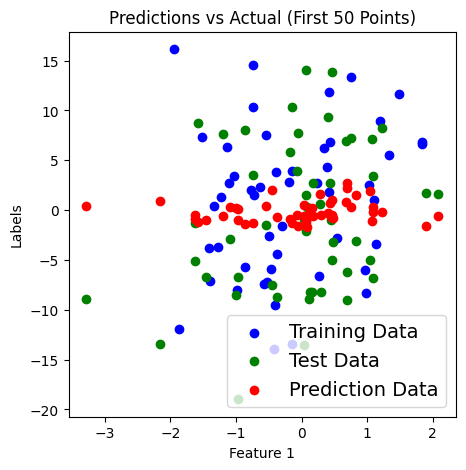

Epoch: 0 | MAE Train Loss: 6.588222026824951 | MAE Test Loss: 6.5016021728515625 
Parameter weights: tensor([ 0.3370,  0.1306,  0.2375,  0.2339, -1.1166])
Parameter bias: tensor([-0.1856])
Epoch: 10 | MAE Train Loss: 6.52290153503418 | MAE Test Loss: 6.4377970695495605 
Parameter weights: tensor([ 0.3396,  0.1490,  0.2679,  0.2699, -1.0540])
Parameter bias: tensor([-0.1781])
Epoch: 20 | MAE Train Loss: 6.4576873779296875 | MAE Test Loss: 6.37410831451416 
Parameter weights: tensor([ 0.3418,  0.1678,  0.2982,  0.3057, -0.9915])
Parameter bias: tensor([-0.1709])
Epoch: 30 | MAE Train Loss: 6.392481803894043 | MAE Test Loss: 6.310420989990234 
Parameter weights: tensor([ 0.3440,  0.1865,  0.3285,  0.3416, -0.9290])
Parameter bias: tensor([-0.1636])
Epoch: 40 | MAE Train Loss: 6.3272881507873535 | MAE Test Loss: 6.246756076812744 
Parameter weights: tensor([ 0.3462,  0.2054,  0.3589,  0.3774, -0.8666])
Parameter bias: tensor([-0.1563])
Epoch: 50 | MAE Train Loss: 6.2621307373046875 | MAE T

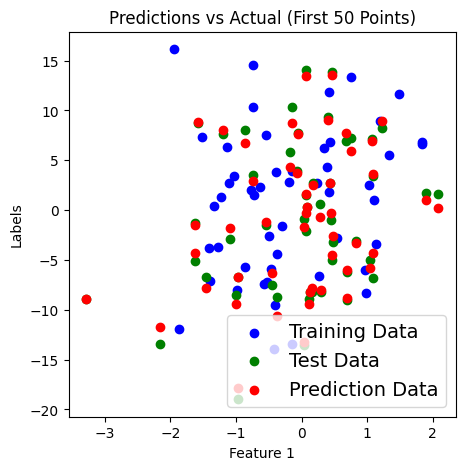

Saving model to: models/01_pytorch_workflow_model_0.pth


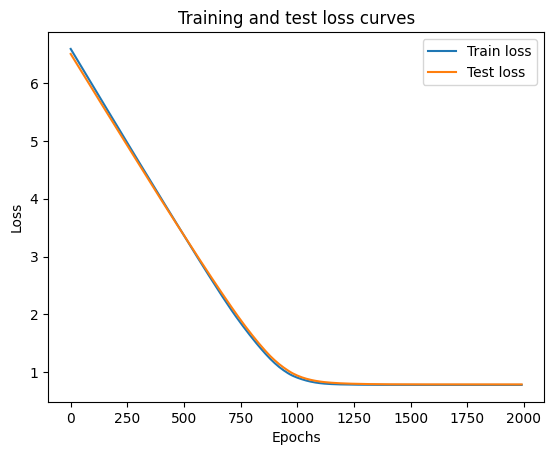

In [2]:
#define the true weight array
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import numpy as np

trueWeight = np.array([1,2,3,4,5])
bias = 0.5

def generate():
    dataset=[]
    for i in range(1000):
        x = np.random.randn(len(trueWeight))
        y = trueWeight.dot(x) + bias + np.random.randn()
        #add the numpy array as is without 
        dataset.append((x,y))
    return dataset

def plot_predictions(train_data, train_labels, test_data, test_labels, predictions=None):
    plt.figure(figsize=(5,5))

    train_data=train_data[:50]
    train_labels = train_labels[:50]
    test_data = test_data[:50]
    test_labels = test_labels[:50]

    if predictions is not None:
        predictions = predictions[:50]

    plt.scatter(train_data[:,0], train_labels, c='b', label='Training Data')
    plt.scatter(test_data[:,0], test_labels, c='g', label='Test Data')

    if predictions is not None:
        plt.scatter(test_data[:,0], predictions, c='r', label='Prediction Data')

    plt.title("Predictions vs Actual (First 50 Points)")
    plt.xlabel("Feature 1")
    plt.ylabel("Labels")
    plt.legend(prop={"size": 14})
    plt.show()

class TestLinearRegressionModel(nn.Module):
    def __init__(self): 
        super().__init__()
        self.weights = nn.Parameter(torch.randn(len(trueWeight), dtype=torch.float), requires_grad=True)
        print("Self weights size :", self.weights.shape)
        self.bias = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad= True)
    
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return x.matmul(self.weights) + self.bias


#plot loss
def plotlosscurve(train_loss_values, test_loss_values, epoch_count):
    plt.plot(epoch_count, train_loss_values, label="Train loss")
    plt.plot(epoch_count, test_loss_values, label="Test loss")
    plt.title("Training and test loss curves")
    plt.ylabel("Loss")
    plt.xlabel("Epochs")
    plt.legend();


# main routine
dataset= generate()

x_list, y_list = zip(*dataset)
x_tensor = torch.tensor(x_list, dtype= torch.float32)
y_tensor = torch.tensor(y_list, dtype= torch.float32)


# for i in range(10):
#     print (x[i], y[i])
# Create *known* parameters
# weight = 0.7
# bias = 0.3

# # Create data
# start = 0
# end = 1
# step = 0.02
# X = torch.arange(start, end, step).unsqueeze(dim=1)
# y = weight * X + bias +  np.random.randn()

train_split = int(0.8* len(x_tensor))
x_train, y_train = x_tensor[:train_split], y_tensor[:train_split]
x_test, y_test = x_tensor[train_split:], y_tensor[train_split:]

print("")
len(x_train), len(y_train), len(x_test), len(y_test)

print(x_train.shape)
print(y_train.shape)

#x_tensor = x_tensor.squeeze(1)

print(x_test.shape)
print(y_test.shape)

#plot_predictions(x_train, y_train, x_test, y_test)

torch.manual_seed(42)
model_0 = TestLinearRegressionModel()
list(model_0.parameters())
model_0.state_dict()

with torch.inference_mode():
    y_preds = model_0(x_test)

print("prediction vector shapes", y_preds.shape)
#print(y_preds)

print("Before training..")
plot_predictions(x_train, y_train, x_test, y_test, y_preds)

#define the loss function
loss_fn = nn.L1Loss()

#Create the optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.01)

#number of epochs
epochs =2000

#create empty training and test loss vectors
train_loss_values = []
test_loss_values=[]
epoch_count=[]

for epoch in range(epochs):

    #put the model in a training mode
    model_0.train()
    y_pred = model_0(x_train)
    loss = loss_fn(y_pred, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    #set to eval mode
    model_0.eval()

    with torch.inference_mode():
        test_pred = model_0(x_test)
        test_loss = loss_fn(test_pred, y_test.type(torch.float))

        if epoch % 10 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")
            # Print model parameters
            for name, param in model_0.named_parameters():
                if param.requires_grad:
                    print(f"Parameter {name}: {param.data}")


print(f"After training for {epoch} iterations")
plot_predictions(x_train, y_train, x_test, y_test, test_pred)
plotlosscurve(train_loss_values, test_loss_values, epoch_count)

from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH/MODEL_NAME

# 3. Save the model state dict 
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(), # only saving the state_dict() only saves the models learned parameters
           f=MODEL_SAVE_PATH)






In [16]:
from dataclasses import dataclass
import copy

class dataNode:
    def __init__(self, name, salary):
        self.name: str = name
        self.salary: int = salary

    def __eq__(self, obj):
        return self.name==obj.name and self.salary==obj.salary

    def __lt__(self, obj):
        return self.salary < obj.salary

    def __gt__(self, obj):
        return self.salary > obj.salary

    def __str__(self):
        return f" name: {self.name}, salary: {self.salary}"

#@dataclass
class node:
    def __init__(self, user):
        self.userData = copy.copy(user)
        self.gtptr : 'node' = None
        self.ltptr :  'node' = None


data1 = dataNode("a", 5000)

node1 = node(data1)

print(data1)
print(node1.userData)

data1.name="ravi"

print("with modified data")

print(data1)
print(node1.userData)

 name: a, salary: 5000
 name: a, salary: 5000
with modified data
 name: ravi, salary: 5000
 name: a, salary: 5000


In [4]:
import torch
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader

class MyTrainDataset(Dataset):
    def __init__(self, size):
        self.size = size
        self.data = [(torch.rand(20), torch.rand(1)) for _ in range(size)]

    def __len__(self):
        return self.size
    
    def __getitem__(self, index):
        return self.data[index]

class Trainer:
    def __init__(
        self,
        model: torch.nn.Module,
        train_data: DataLoader,
        optimizer: torch.optim.Optimizer,
        gpu_id: int,
        save_every: int, 
    ) -> None:
        self.gpu_id = gpu_id
        self.model = model.to(gpu_id)
        self.train_data = train_data
        self.optimizer = optimizer
        self.save_every = save_every

    def _run_batch(self, source, targets):
        self.optimizer.zero_grad()
        output = self.model(source)
        loss = F.cross_entropy(output, targets)
        loss.backward()
        self.optimizer.step()

    def _run_epoch(self, epoch):
        b_sz = len(next(iter(self.train_data))[0])
        print(f"[GPU{self.gpu_id}] Epoch {epoch} | Batchsize: {b_sz} | Steps: {len(self.train_data)}")
        for source, targets in self.train_data:
            source = source.to(self.gpu_id)
            targets = targets.to(self.gpu_id)
            self._run_batch(source, targets)

    def _save_checkpoint(self, epoch):
        ckp = self.model.state_dict()
        PATH = "checkpoint.pt"
        torch.save(ckp, PATH)
        print(f"Epoch {epoch} | Training checkpoint saved at {PATH}")

    def train(self, max_epochs: int):
        for epoch in range(max_epochs):
            self._run_epoch(epoch)
            if epoch % self.save_every == 0:
                self._save_checkpoint(epoch)


def load_train_objs():
    train_set = MyTrainDataset(2048)  # load your dataset
    model = torch.nn.Linear(20, 1)  # load your model
    optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)
    return train_set, model, optimizer


def prepare_dataloader(dataset: Dataset, batch_size: int):
    return DataLoader(
        dataset,
        batch_size=batch_size,
        pin_memory=True,
        shuffle=True
    )


def main(device, total_epochs, save_every, batch_size):
    dataset, model, optimizer = load_train_objs()
    train_data = prepare_dataloader(dataset, batch_size)
    trainer = Trainer(model, train_data, optimizer, device, save_every)
    trainer.train(total_epochs)


if __name__ == "__main__":
    import argparse
    # parser = argparse.ArgumentParser(description='simple distributed training job')
    # parser.add_argument('total_epochs', type=int, help='Total epochs to train the model')
    # parser.add_argument('save_every', type=int, help='How often to save a snapshot')
    # parser.add_argument('--batch_size', default=32, type=int, help='Input batch size on each device (default: 32)')
    # args = parser.parse_args()
    
    device = 0  # shorthand for cuda:0
    main(device, 50 , 10, 32)

AssertionError: Torch not compiled with CUDA enabled

In [11]:

import os

class Test():
    name: str 
    salary : int

    def __init__(self, _salary):
        self.salary = _salary

    def __str__(self):
        return f"name {Test.name}, salary: {Test.salary}, salary:{self.salary}"

Test.name="ravi"
Test.salary= 10000
test1 = Test(1000)
print(test1)



name ravi, salary: 10000, salary:1000


In [16]:
def bubbleSort(items: list):
    for i in range(1,len(items)-1):
            if items[i] > items[i+1]:
                #swap the items
                temp= items[i]
                items[i] = items[i+1]
                items[i+1] = temp
    print(items)

items=["ada", "awere", "fghg", "tyuyt", "cvbff"]
bubbleSort(items)

['ada', 'awere', 'fghg', 'cvbff', 'tyuyt']


In [18]:
import platform
import sys

import pandas as pd
import sklearn as sk
import torch

has_gpu = torch.cuda.is_available()
has_mps = torch.backends.mps.is_built()
device = "mps" if has_mps else "cuda" if has_gpu else "cpu"

print(f"Python Platform: {platform.platform()}")
print(f"PyTorch Version: {torch.__version__}")
print()
print(f"Python {sys.version}")
print(f"Pandas {pd.__version__}")
print(f"Scikit-Learn {sk.__version__}")
print("GPU is", "available" if has_gpu else "NOT AVAILABLE")
print("MPS (Apple Metal) is", "AVAILABLE" if has_mps else "NOT AVAILABLE")
print(f"Target device is {device}")

Python Platform: macOS-14.2.1-x86_64-i386-64bit
PyTorch Version: 2.2.2

Python 3.10.5 (main, Sep 28 2024, 23:39:19) [Clang 12.0.0 (clang-1200.0.32.27)]
Pandas 2.2.2
Scikit-Learn 1.3.0
GPU is NOT AVAILABLE
MPS (Apple Metal) is AVAILABLE
Target device is mps


In [36]:
def toUpperCase(_string : str):
    _string=_string.strip()
    newStr = _string[0].upper()+_string[1:]
    return newStr

items = ['sun', ' moon', 'rain ', ' pleasent', 'queen ']
items= list(map(toUpperCase, items))
print(items)


['Sun', 'Moon', 'Rain', 'Pleasent', 'Queen']
